## <span style='color:#56f749'>Write a Jupyter Notebook explaining all the Descriptive Statistics. 


<ul>
    <center><h3><u>Index</h3></center>
 <li>Mean </li>
<li>Median <br></li>
<li>Mode <br></li>
<li>Variance</li>
<li>Standard Deviation <br></li>
<li>Correlation <br></li>
<li>Normal Distribution (use references) <br></li>
<li>Feature of Normal Distribution <br></li>
<li>Positively Skewed & Negatively Skewed Normal Distribution <br></li>
<li>Effect on Mean, Median and Mode due to Skewness<br></li>
<li>Explain QQ Plot and show the implementation of the same<br></li>
<li>Explain Box Cox and show the implementation of the same<br></li>
</ul>


## Mean or Average Basically the center point of any data. Inorder to find mean we need to sum the total given number divided by the total count of the numbers.It also known as expected value.
Example:
A=[1,2,3,4,5]
Mean= $$\left( \frac{\sum_{i=0}^{n} Ai}{Count(A} \right)$$
In this case : $$\left( \frac {1+2+3+4+5}{5} \right) =  \frac {15}{5} = 3 $$



In [193]:
import pandas as pd
import numpy as np

In [1]:
data=pd.read_csv('data.csv',index_col=False)
data.describe()

<IPython.core.display.Javascript object>

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
count,50.000000,50.000000,50.000000,50.000000,5.000000e+01,50.000000
mean,41558.000000,18818.000000,4.060000,3060.000000,4.900190e+05,1.460000
std,26097.908979,12090.216824,1.517382,6241.434948,3.201358e+05,0.734291
min,5000.000000,2000.000000,1.000000,0.000000,6.420000e+04,1.000000
25%,23550.000000,10000.000000,3.000000,0.000000,2.587500e+05,1.000000
50%,35000.000000,15500.000000,4.000000,0.000000,4.474200e+05,1.000000
75%,50375.000000,25000.000000,5.000000,3500.000000,5.947200e+05,2.000000
max,100000.000000,50000.000000,7.000000,35000.000000,1.404000e+06,4.000000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Mthly_HH_Income           50 non-null     int64 
 1   Mthly_HH_Expense          50 non-null     int64 
 2   No_of_Fly_Members         50 non-null     int64 
 3   Emi_or_Rent_Amt           50 non-null     int64 
 4   Annual_HH_Income          50 non-null     int64 
 5   Highest_Qualified_Member  50 non-null     object
 6   No_of_Earning_Members     50 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 2.9+ KB


### Since highly qualifeid member is an non-numeric data we need to drop it

In [195]:
data.drop('Highest_Qualified_Member',inplace=True,axis=1)

In [196]:
data.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
0,5000,8000,3,2000,64200,1
1,6000,7000,2,3000,79920,1
2,10000,4500,2,0,112800,1
3,10000,2000,1,0,97200,1
4,12500,12000,2,3000,147000,1


In [197]:
data.mean()

Mthly_HH_Income           41558.00
Mthly_HH_Expense          18818.00
No_of_Fly_Members             4.06
Emi_or_Rent_Amt            3060.00
Annual_HH_Income         490019.04
No_of_Earning_Members         1.46
dtype: float64

In [198]:
data.sum()/data.count()

Mthly_HH_Income           41558.00
Mthly_HH_Expense          18818.00
No_of_Fly_Members             4.06
Emi_or_Rent_Amt            3060.00
Annual_HH_Income         490019.04
No_of_Earning_Members         1.46
dtype: float64

##  Median
<span style='color:#548321'>Median is the point which divides the data point into the equal halves. The median is calculated by following steps: <br>1.First sort the data in ascending order. <br>2.If the number of observations are odd, median is given by the middle observation in the sorted form.  <br>3.If the number of observations are even, median is given by the mean of the two middle observation in the sorted form 

In [199]:
#using built-in function
data.median()

Mthly_HH_Income           35000.0
Mthly_HH_Expense          15500.0
No_of_Fly_Members             4.0
Emi_or_Rent_Amt               0.0
Annual_HH_Income         447420.0
No_of_Earning_Members         1.0
dtype: float64

In [200]:
df = data.apply(lambda x: x.sort_values().values)
n=df.count()
n=int(n[0])
df.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
0,5000,2000,1,0,64200,1
1,6000,4500,2,0,79920,1
2,10000,5000,2,0,97200,1
3,10000,6600,2,0,112800,1
4,12500,7000,2,0,147000,1


In [201]:
#without using built-in function
z=list(df.columns)
p=[]
for i in range(6):
    p.append(list(df.iloc[0:,i]))
for i in range(6):  
    if n % 2 == 0:
        median1 = p[i][n//2]

        median2 = p[i][n//2 - 1]
        median = (median1 + median2)/2
    else:
        median =p[i][n//2]

    print(str(z[i]),(median))

# print(p)
# n=len(p)
# n

Mthly_HH_Income 35000.0
Mthly_HH_Expense 15500.0
No_of_Fly_Members 4.0
Emi_or_Rent_Amt 0.0
Annual_HH_Income 447420.0
No_of_Earning_Members 1.0


### we have already soreted our dataset values,and we can see the row count of each column is 50. That means we have an odd number

## <u>Mode
<span style='color:#5f8ff1'>Mode is the number which has the maximum frequency in the entire data set.

In [202]:
#with builtin library
data.mode()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
0,45000,25000,4,0,590400,1


In [203]:
#without built-in library
for i in range(6):
    m=max(p[i],key=p[i].count)
    print(str(z[i]),':',m)


Mthly_HH_Income : 45000
Mthly_HH_Expense : 25000
No_of_Fly_Members : 4
Emi_or_Rent_Amt : 0
Annual_HH_Income : 590400
No_of_Earning_Members : 1


## <u> Variance
Variance is basically a statistical measurement of spread between numbers in a  dataset. To be Specific the variance basically measure the distance of data points from the mean of that dataset. Variance is vastly used by investors in sharemarket to see how much risk an investment carries and wheather it will be profitable or not.
    
Formula :
    $$ \sigma^2 =\frac {\sum_{i=1}^{n} (x_i - \bar{x})^2} {n} $$
     Where 
    $$ x^i = i^{th} \; datapoint   $$ 
    $$ \bar{x} = \; Mean \; of \; all \; Datapoints $$ 
    $$ n= \; no \; of datapoints $$

In [204]:
from decimal import Decimal
k=data.var()
for i in k:
    print(Decimal(i))

681100853.061224460601806640625
146173342.857142865657806396484375
2.30244897959183703051166958175599575042724609375
38955510.204081632196903228759765625
102486925397.9167327880859375
0.53918367346938766981878643491654656827449798583984375


In [205]:
#without using built-in function
sum=0
l=[]
mean1=list(data.sum()/data.count())
for i in range(6):
    for j in range(50):
        sum=sum+(p[i][j]-mean1[i])**2
    l.append(sum/n)
    sum=0
print(l)
    

[667478836.0, 143249876.0, 2.2563999999999984, 38176400.0, 100437186889.95831, 0.5284]


In [206]:
data.var()

Mthly_HH_Income          6.811009e+08
Mthly_HH_Expense         1.461733e+08
No_of_Fly_Members        2.302449e+00
Emi_or_Rent_Amt          3.895551e+07
Annual_HH_Income         1.024869e+11
No_of_Earning_Members    5.391837e-01
dtype: float64

## <u> Standard Deviation
Standard deviation is basically denotes the measurement of the data dispersion or variation.The Lower value of standard deviation denotes that the datapoints are closer to the mean not spread too much.A higher value of of standard deviation denotes that the data points are spread wide range.
    
  1.The mean value is calculated by adding all the data points and dividing by the number of data points.<br>
2.The variance for each data point is calculated by subtracting the mean from the value of the data point. Each of those resulting values is then squared and the results summed. The result is then divided by the number of data points less one.<br>
3.The square root of the variance—result from no. 2—is then used to find the standard deviation.

    
<span style='color:#8734fa'>Formula</span>
        $$ \sigma =\sqrt{\frac {\sum_{i=1}^{n} (x_i - \bar{x})^2} {n}} $$

    

where:
$$ x^i \;= \;Value \; of \; the \; i^{th} \; point \; in \; the \; data \; set $$
$$ \bar{x} \;\; = \; \;The \; mean \; value \; of \; the \; data \; set $$
$$ n \; = \; The \; number \; of \; data \; points \; in \; the \; data \; set $$


In [207]:
#without using built-in function
import math
sum=0
l=[]
mean1=list(data.sum()/data.count())
for i in range(6):
    for j in range(50):
        sum=sum+(p[i][j]-mean1[i])**2
    l.append(math.sqrt(sum/n))
    sum=0
print(l)
    

[25835.611779092826, 11968.704023410388, 1.5021318184500314, 6178.705366013175, 316918.26531451027, 0.72691127381545]


In [208]:
data.std()

Mthly_HH_Income           26097.908979
Mthly_HH_Expense          12090.216824
No_of_Fly_Members             1.517382
Emi_or_Rent_Amt            6241.434948
Annual_HH_Income         320135.792123
No_of_Earning_Members         0.734291
dtype: float64

## <u> Correlation </u>
Correlation is a statistical measurement to measure the relation betwen two  variables. The Correlation between two variables lies between -1 to +1. If our corealation value>1 or <1 then there must be some error in our calculations.The +1 known as perfect positive co-rrelation and -1 denotes the perfect negative correlation.


$$ r = \frac{{}\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}
{\sqrt{\sum_{i=1}^{n} (x_i - \overline{x})^2(y_i - \overline{y})^2}} $$

In [209]:
#with in-built library function 
data.corr(method ='kendall')

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
Mthly_HH_Income,1.000000,0.483825,0.365908,-0.025749,0.872913,0.280929
Mthly_HH_Expense,0.483825,1.000000,0.565001,0.333334,0.472894,0.302092
No_of_Fly_Members,0.365908,0.565001,1.000000,0.088261,0.347993,0.494580
Emi_or_Rent_Amt,-0.025749,0.333334,0.088261,1.000000,-0.018410,-0.115936
Annual_HH_Income,0.872913,0.472894,0.347993,-0.018410,1.000000,0.234381
No_of_Earning_Members,0.280929,0.302092,0.494580,-0.115936,0.234381,1.000000


In [210]:
# Without Library Function

x = p[0]
y = p[1]

x_mean = np.sum(x) / len(x)
y_mean = np.sum(y) / len(y)

cov_xy = [(i - x_mean) * (j - y_mean) for i,j in zip(x, y)]
cov_xy = np.sum(cov_xy) / len(cov_xy)

x_std = (np.sum([(i - x_mean)**2 for i in x]) / len(x)) ** 0.5
y_std = (np.sum([(i - y_mean)**2 for i in y])/len(y)) ** 0.5

correlation = cov_xy / (x_std * y_std)

print('Pearson Correlation Coefficient :', correlation)


Pearson Correlation Coefficient : 0.984269278598793


## <u>Normal Distribution</u>
Normal distribution is also known as gaussian distribution.It is  a probability distribution and also symmetric about the mean and showing the data  near the mean are more frequent in occurrence than data far from the mean.

<AxesSubplot:ylabel='Density'>

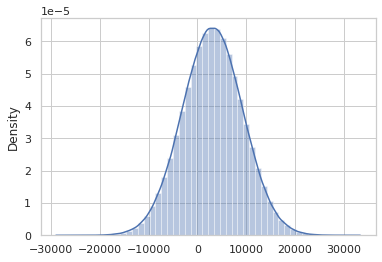

In [211]:
## we are plotting the distribution plot for the first column : Mthly_HH_Income


mean1=np.mean(p[3])
sd=np.std(p[3])

import warnings
warnings.filterwarnings('ignore')
# Plot between -10 and 10 with .001 steps.
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

# Plot between -10 and 10 with .001 steps.
x_axis = np.random.normal(mean1, sd,1000000)
# Mean = 0, SD = 2.
sns.distplot(x_axis)

## <u> Feature of Normal Distribution </u>
<ul>
    <li><u>It is Symmetric</u> : A normal Distribution should be symmetric that means that the distribution plot will divide the entire dataset into two equal halves. </li> 
    <li><u> Mean,Median,Mode is Equal </u> : The middle point of a normal distribution has the maximum frequency.That means this point posseses the most observations of the variable </li>
    <li><u> </u>
    
    

### <u> SKEW OF DISTRIBUTION </u>
In a Distribution if one tail is longer than other tail then it is skew.Skewness also called as assymmetric distributions as they don't show any kind of symmetric properties but normal distribution show the symmetric property<br>
#### ** Symmetric means one tail is the mirror image of other half

## A left long tail known as left-skewed distribution also known  as negative dristibution.
## A right long tail distribution known as right skewed distribution also known as positive distribution

### 1.If skewness is less than -1 or greater than 1, the distribution is highly skewed.
### 2.If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
### 3.If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

In [212]:
##skewness for the first column
data.skew()

Mthly_HH_Income          0.924615
Mthly_HH_Expense         1.199461
No_of_Fly_Members        0.113674
Emi_or_Rent_Amt          3.403680
Annual_HH_Income         1.192949
No_of_Earning_Members    1.593301
dtype: float64

#### From the above we can see that the Emi_or_Rent_Amt column is highly skewed 

<AxesSubplot:ylabel='Density'>

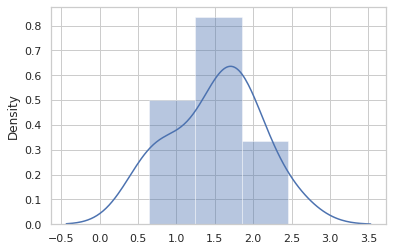

In [213]:
## we are plotting the distribution plot for the first column : Mthly_HH_Income


mean1=np.mean(p[5])
sd=np.std(p[5])

import warnings
warnings.filterwarnings('ignore')
# Plot between -10 and 10 with .001 steps.
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

# Plot between -10 and 10 with .001 steps.
x_axis = np.random.normal(mean1, sd,10)
# Mean = 0, SD = 2.
sns.distplot(x_axis)

## It is right skewed


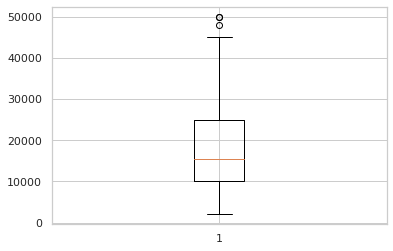

In [214]:
import seaborn as sns
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots()
ax.boxplot(p[1])
plt.show()


### <u>Effect on Mean, Median and Mode due to Skewness</u>
#### Among the three measures of central tendancy mean is highly effected by the skewness.For distributions that has outliers we often choose median as a prefer tendency because median is more resistance than mean, that means that if the add anyt outliers in it then there will be a huge change in mean than median. If we see that the distribution is skewed to the left that means that the mean is less than median,which is often less than the mode. if the distribution is skewed to the right that means the mode is less than the median which is often less than the mean.


#### <u>Explain QQ Plot and show the implementation of the sameExplain QQ Plot and show the implementation of the same


Q-Q plots also known as Quantile-Quantile plot is plots of two quantiles against each other.The main objective of this plot is to check wheather two sets of data come from the same distribution. We can simply tell the type of distribution by looking at the graph of Q-Q plot

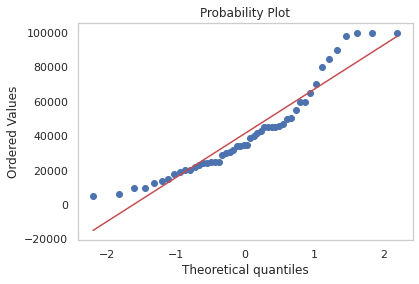

In [215]:
from scipy import stats

stats.probplot(data['Mthly_HH_Income'], dist="norm", plot=plt)

plt.grid()

### Explain Box Cox and show the implementation of the same

#### A box-cox plot is basically used to convert the non-normally distributed dataset into the normally distributed dataset


<AxesSubplot:ylabel='Density'>

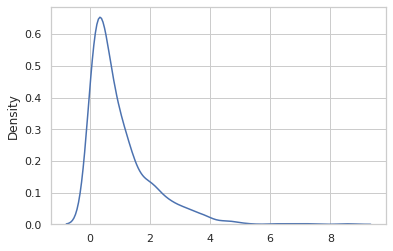

In [216]:
import numpy as np 
from scipy.stats import boxcox 
import seaborn as sns 

#set seed to 0
np.random.seed(0)

#generate dataset
data = np.random.exponential(size=1000)

#plot the distribution of data values
sns.distplot(data, hist=False, kde=True) 

### We can see that the data is non-normally distributed. so we need to use the box-cox 
### plot in-order to make it nomally distributed dataset

<AxesSubplot:ylabel='Density'>

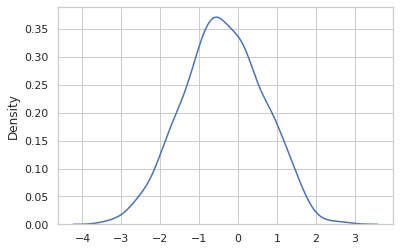

In [217]:
#perform Box-Cox 
transformed_data, best_lambda = boxcox(data) 

#plot the distribution of the transformed data 
sns.distplot(transformed_data, hist=False, kde=True) 

## Thank you